In [1]:
!ls

06-neiss.ipynb
06-potholes.ipynb
06-potholes-soma.ipynb
06-testing-API-to-Pandas.ipynb
06-testing-API-to-Pandas-soma.ipynb
crypto
LICENSE
neiss
neiss-soma.ipynb
potholes
wafflehouses


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [51]:
# Drop to the command line, and say
# show me the first 5 rows of this file
!head -n 5 neiss/neiss2017.tsv

"CPSC_Case_Number"	"Treatment_Date"	"Age"	"Sex"	"Race"	"Other_Race"	"Body_Part"	"Diagnosis"	"Other_Diagnosis"	"Disposition"	"Location"	"Fire_Involvement"	"Product_1"	"Product_2"	"Narrative_1"	"Narrative_2"	"Stratum"	"PSU"	"Weight"
170100733	01/01/2017	21	1	1		75	62		1	1	0	1207	0	21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE	. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION	S	46	77.6641
170100734	01/01/2017	71	1	1		31	53		1	5	0	1807	0	71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION		S	46	77.6641
170100735	01/01/2017	16	1	1		33	51		1	1	0	676	342	16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE	DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM	S	46	77.6641
170100737	01/01/2017	55	2	1		75	62		1	1	0	620	0	55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED	HEAD INJURY	S	46	77.6641


In [4]:
# \t means 'the tab character'
# \n means 'a new line'
# sep= means "this is what separated our stuff"
# encoding= says "this is the encoding I want to use"
# since unicode/utf-8 doesn't work, we'll try latin-1
df = pd.read_csv("neiss/neiss2017.tsv", sep='\t', encoding='latin-1', na_values=[0, "UNKNOWN"])
df.head(2)

C:\Program Files (x86)\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1.0,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1.0,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


How many rows (and columns) do we have?

In [5]:
df.shape

(386907, 19)

In [55]:
df.tail(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
386902,180309762,12/30/2017,2.0,Female,White,NaN,85.0,68.0,NaN,4.0,1.0,NaN,1931.0,NaN,2YR F INGESTED 9 OF MOTHERS GLIPIZIDE PILLS;DX...,NaN,C,20.0,4.757
386906,180309766,12/31/2017,2.0,Female,White,NaN,85.0,68.0,NaN,4.0,1.0,NaN,1931.0,NaN,2YR F GOT INTO DAD'S ***;DX ACCIDENTAL DRUG IN...,NaN,C,20.0,4.757


In [7]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                 float64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [8]:
df.Sex.value_counts()

1.0    208695
2.0    178203
8.0         1
Name: Sex, dtype: int64

In [9]:
df.Sex.head(5)

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: Sex, dtype: float64

In [10]:
# 1 - Male
# 2 - Female
# 0 - Not recorded
# 8 - ???????

# When we make a change, we need to do df['column'] = ....
# or else it won't update the column

df['Sex'] = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: 'Not recorded'
})

In [11]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [12]:
df.Sex.value_counts()

Male      208695
Female    178203
8.0            1
Name: Sex, dtype: int64

In [13]:
# Just show me the row where 'Sex' is 8
df[df.Sex == 8]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Oh weird, we're missing a treatment date and other stuff....
df.head(3)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641


# Dealing with missing data

In [15]:
# Is treatment date empty???
# .isna() or .isnull()
df.Treatment_Date.isna()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
386877    False
386878    False
386879    False
386880    False
386881    False
386882    False
386883    False
386884    False
386885    False
386886    False
386887    False
386888    False
386889    False
386890    False
386891    False
386892    False
386893    False
386894    False
386895    False
386896    False
386897    False
386898    False
386899    False
386900    False
386901    False
386902    False
386903    False
386904    False
386905    False
386906    False
Name: Treatment_Date, Le

In [16]:
df[df.Treatment_Date.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# False is 0, True is 1
# So every time Treatment Date is missing, it adds 1
df.Treatment_Date.isna().sum()

1

In [18]:
# Adds up all of the Trues as 1, False as 0
(df.Sex == 'Male').sum()

208695

In [19]:
# Remove rows that are missing data in ONE (or more) specific columns
df = df.dropna(subset=['Treatment_Date'])

In [20]:
df[df.Treatment_Date.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


# We got rid of Age being C, so let's look at it again

In [21]:
# Smallest age in the dataset
# Can't do this yet!
# df.Age.min()

In [22]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                  object
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [23]:
#int('5')
# PERMANENTLY change the Age into an integer
df['Age'] = df.Age.astype(float)

In [24]:
df.Age.min()

2.0

In [25]:
df.Age.median()

29.0

In [26]:
df.Age.describe()

count    386886.000000
mean         44.370753
std          49.561221
min           2.000000
25%          12.000000
50%          29.000000
75%          60.000000
max         223.000000
Name: Age, dtype: float64

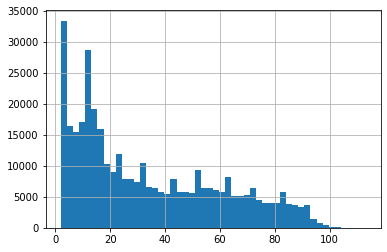

In [52]:
df.Age.hist(bins=50)

In [28]:
# Count up all of the times age is greater than 200
# False counts as 0
# True counts as 1
# so you can do .sum() to add up all of the 1's
(df.Age >= 200).sum()

22818

In [29]:
# You COULD run this to get of those tiny tiny people,
# and only keep people under 200 years old
df = df[df.Age < 200]

In [30]:
# How many people are still over 200?
(df.Age >= 200).sum()

0

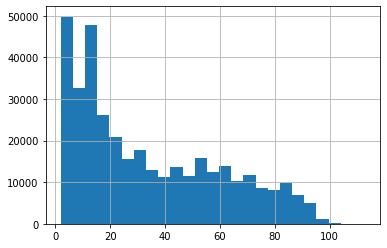

In [31]:
df.Age.hist(bins=25)

In [32]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [33]:
df.groupby('Sex').Age.median()

Sex
Female    32.0
Male      21.0
Name: Age, dtype: float64

Sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

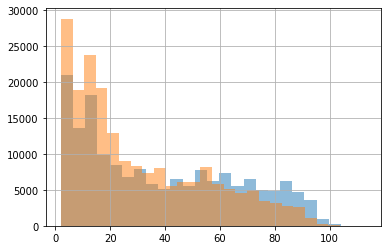

In [34]:
df.groupby('Sex').Age.hist(alpha=0.5, bins=25)

# Race column!!!

In [35]:
# Make sure you do df['Race'] = to update the column with the replacements
df['Race'] = df.Race.replace({
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
})

In [36]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,White,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


# Bar chart of the number of times each race shows up in our dataset

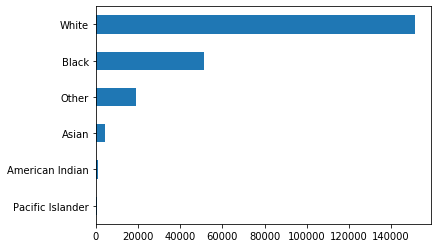

In [37]:
df.Race.value_counts().sort_values().plot(kind='barh')

In [38]:
df.Race.value_counts(normalize=True)

White               0.666106
Black               0.225171
Other               0.083243
Asian               0.018597
American Indian     0.005174
Pacific Islander    0.001709
Name: Race, dtype: float64

In [39]:
df.Sex.value_counts(normalize=True)

Male      0.538822
Female    0.461178
Name: Sex, dtype: float64

In [40]:
df.Sex.value_counts()

Male      196165
Female    167898
Name: Sex, dtype: int64

In [41]:
df.Sex.value_counts(dropna=False)

Male      196165
Female    167898
NaN            5
Name: Sex, dtype: int64

## Other Race

In [42]:
df.Other_Race.value_counts().head(10)

HISPANIC        15728
MULTI-RACIAL     2004
HISP              760
SOMALI            361
NS                300
UNKN              118
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
Name: Other_Race, dtype: int64

In [43]:
import numpy as np

df['Other_Race'] = df.Other_Race.replace(["NS", "UNKN"], np.nan)
df.Other_Race.value_counts().head(20)

HISPANIC        15728
MULTI-RACIAL     2004
HISP              760
SOMALI            361
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
NON HISPANIC       14
ARAB               13
MEXICAN            13
PUERTO RICAN       13
DECLINE            12
DO NOT KNOW        11
`                  11
UNK                10
SPANISH             8
HISPAINC            8
DECLINED            7
HISAPNIC            6
Name: Other_Race, dtype: int64

In [44]:
df[df.Other_Race == "HISPANIC"]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,Other,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,Other,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
173,170106715,01/01/2017,6.0,Male,Other,HISPANIC,75.0,52.0,NaN,1.0,1.0,NaN,1807.0,NaN,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HE...,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18.0,Male,Other,HISPANIC,79.0,64.0,NaN,1.0,1.0,NaN,604.0,NaN,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING P...,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
177,170106722,01/01/2017,10.0,Male,Other,HISPANIC,NaN,41.0,NaN,1.0,1.0,NaN,1682.0,NaN,10YOM-PT HAD A BOBBY PIN IN MOUTH & ACCIDENTAL...,DX- SWALLOWED BOBBY PIN.,C,90.0,4.7570
178,170106724,01/01/2017,13.0,Male,Other,HISPANIC,35.0,64.0,NaN,1.0,1.0,NaN,1233.0,NaN,13YOM-PT WAS JUMPING ON A TRAMPLOLINE W/ FRIEN...,KNEE. FELT A POP. DX- RIGHT KNEE SPRAIN.,C,90.0,4.7570
180,170106726,01/01/2017,2.0,Female,Other,HISPANIC,76.0,59.0,NaN,1.0,1.0,NaN,4057.0,NaN,2YOF-PT FELL HITTING FOREHEAD ONTO THE TABLE P...,FOREHEAD. DX- 0.5CM FOREHEAD LACERATION.,C,90.0,4.7570
188,170106886,01/02/2017,4.0,Male,Other,HISPANIC,38.0,71.0,PENILE PAIN,1.0,NaN,NaN,649.0,NaN,4YOM DROPPED A TOILET SEAT ON HIS PENIS 2 MONT...,DISCHARGE AND PAIN FOR 3 DAYS; PENILE PAIN AND...,C,8.0,4.7570
270,170107147,01/02/2017,27.0,Male,Other,HISPANIC,83.0,57.0,NaN,1.0,1.0,NaN,1842.0,NaN,LEFT FDOT FX. 27 YOM WAS RUNNING DOWNSTAIRS WH...,STEP AND TWISTED HIS FOOT.,V,95.0,16.1828
316,170107695,01/01/2017,10.0,Male,Other,HISPANIC,93.0,53.0,NaN,1.0,1.0,NaN,5019.0,NaN,10 YOM C/O LEFT MIDDLE TOE PAIN AFTER DROPPING...,DX: TOE CONTUSION,V,61.0,16.1828


In [45]:
df[df.Other_Race.str.contains("HISP", na=False)]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,Other,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,Other,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
173,170106715,01/01/2017,6.0,Male,Other,HISPANIC,75.0,52.0,NaN,1.0,1.0,NaN,1807.0,NaN,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HE...,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18.0,Male,Other,HISPANIC,79.0,64.0,NaN,1.0,1.0,NaN,604.0,NaN,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING P...,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
177,170106722,01/01/2017,10.0,Male,Other,HISPANIC,NaN,41.0,NaN,1.0,1.0,NaN,1682.0,NaN,10YOM-PT HAD A BOBBY PIN IN MOUTH & ACCIDENTAL...,DX- SWALLOWED BOBBY PIN.,C,90.0,4.7570
178,170106724,01/01/2017,13.0,Male,Other,HISPANIC,35.0,64.0,NaN,1.0,1.0,NaN,1233.0,NaN,13YOM-PT WAS JUMPING ON A TRAMPLOLINE W/ FRIEN...,KNEE. FELT A POP. DX- RIGHT KNEE SPRAIN.,C,90.0,4.7570
180,170106726,01/01/2017,2.0,Female,Other,HISPANIC,76.0,59.0,NaN,1.0,1.0,NaN,4057.0,NaN,2YOF-PT FELL HITTING FOREHEAD ONTO THE TABLE P...,FOREHEAD. DX- 0.5CM FOREHEAD LACERATION.,C,90.0,4.7570
188,170106886,01/02/2017,4.0,Male,Other,HISPANIC,38.0,71.0,PENILE PAIN,1.0,NaN,NaN,649.0,NaN,4YOM DROPPED A TOILET SEAT ON HIS PENIS 2 MONT...,DISCHARGE AND PAIN FOR 3 DAYS; PENILE PAIN AND...,C,8.0,4.7570
270,170107147,01/02/2017,27.0,Male,Other,HISPANIC,83.0,57.0,NaN,1.0,1.0,NaN,1842.0,NaN,LEFT FDOT FX. 27 YOM WAS RUNNING DOWNSTAIRS WH...,STEP AND TWISTED HIS FOOT.,V,95.0,16.1828
316,170107695,01/01/2017,10.0,Male,Other,HISPANIC,93.0,53.0,NaN,1.0,1.0,NaN,5019.0,NaN,10 YOM C/O LEFT MIDDLE TOE PAIN AFTER DROPPING...,DX: TOE CONTUSION,V,61.0,16.1828


In [46]:
df[df.Other_Race.str.contains("HISP", na=False)].Other_Race.value_counts()

HISPANIC        15728
HISP              760
NON HISPANIC       14
HISPAINC            8
HISPANCI            5
HISPAINIC           4
HISPANICE           2
HISPANIC.           2
NONHISPANIC         2
HISPANIC1           1
HISPANI             1
HISPOANIC           1
`HISPANIC           1
HISPANC             1
HISPANICX           1
HISPANIC10          1
NON-HISPANIC        1
?HISPANIC           1
HISPAIN             1
HISPANINC           1
Name: Other_Race, dtype: int64

In [47]:
# IS THIS A REGULAR EXPRESSION??????
# yeah!!
df[df.Other_Race.str.contains("^HISP", na=False)].Other_Race.value_counts()

HISPANIC      15728
HISP            760
HISPAINC          8
HISPANCI          5
HISPAINIC         4
HISPANICE         2
HISPANIC.         2
HISPANC           1
HISPANICX         1
HISPAIN           1
HISPANIC10        1
HISPOANIC         1
HISPANI           1
HISPANIC1         1
HISPANINC         1
Name: Other_Race, dtype: int64

In [48]:
# Replace EXACT values
# df.Other_Race.replace
# ^ the beginning of a line
# .* match ANYTHING
df['Other_Race'] = df.Other_Race.str.replace("^HISP.*", "HISPANIC")
df.Other_Race.value_counts()

HISPANIC           16517
MULTI-RACIAL        2004
SOMALI               361
BIRACIAL              37
NEPALI                36
MULTIRACIAL           28
MULTI RACIAL          24
NON HISPANIC          14
PUERTO RICAN          13
MEXICAN               13
ARAB                  13
DECLINE               12
`                     11
DO NOT KNOW           11
UNK                   10
SPANISH                8
DECLINED               7
HISAPNIC               6
FULANI                 5
MANDARIN               5
NOT STATED             4
N/S                    4
JAPANESE               4
LAO                    4
HAKHA CHIN             3
MIXED                  3
ARABIC                 3
VIETNAMESE             3
UK                     3
RUSSIAN                3
                   ...  
TIGRINYA               1
?HISPANIC              1
HIPSANIC               1
BENGALI                1
AMHARIC                1
TWI                    1
OROMO                  1
MEXICIAN               1
HIPANI                 1


In [49]:
df.Other_Race.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Other_Race, dtype: object

In [50]:
df[df.Other_Race == "NaN"]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
